# Insulin Control

Table 1: Glucose concentrations throughout the day
-------------------------------------------------------------------------------------------------
Time          Glucose Concentration        Insulin     < 70 mg/dL  < 65 mg/dL  < 60 mg/dL
(minutes)                   (mg/dL)         (mU/L)          ( - )       ( - )       ( - )
-------------------------------------------------------------------------------------------------
0.00                          81.00          15.00           0.00        0.00        0.00
840.00                        69.93          12.64           1.00        0.00        0.00
870.00                        62.98           5.45           1.00        1.00        0.00
900.00                        64.69           4.59           1.00        1.00        0.00
-----------------------------------------------------------------------------------------------------


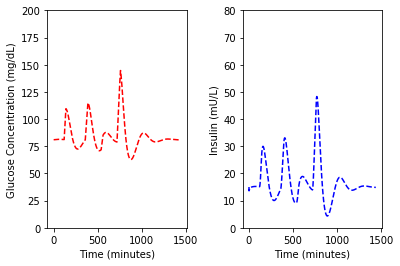

Max Value of Glucose:  144.66366498366492  mg/dL
Max Value of Insulin:  48.306505251471606  mU/L
Min Value of Glucose:  62.760901985102635  mg/dL
Min Value of Insulin:  4.343060138032829  mU/L


In [14]:
import numpy as np #importing libraries and setting call names
from matplotlib import pyplot as plt
import math

###PARAMETERS GIVEN#####
Gb = 4.5 #(mmol/min) glucose baseline
t0 = 0 #(minute)time start
tf = 1440 #(minute) end time in minutes
p1 = 0 #(min^1)
p3 = 0.000013 #(mU/L) 
n=5/54 #(minute)
Ib = 15 #(mU/L) baseline insulin
p2 = 0.025 #(min^1)
V1 = 12 # (L) Blood volume
Ub = n*Ib*V1 #Infusion rate
Kc = 12
tau = 1500

#####Setting up the Loop
itt = 1441 #how many iterations
deltat = (tf-t0)/(itt-1)
t = np.linspace(t0,tf,itt)
G = np.zeros([itt])
X = np.zeros([itt])
I = np.zeros([itt])
U = np.zeros([itt])
errsum = np.zeros([itt])
less70 = np.zeros([itt])
less65 = np.zeros([itt])
less60 = np.zeros([itt])

G[0] = 0 #Initial Values
X[0] = 0
I[0] = 0
U[0] = 0
errsum[0] = 0
less70[0] = 0
less65[0] = 0
less60[0] = 0

## Setting up table: columns = 'Time (minutes)', 'Glucose Concentration (mg/dL)','Insulin (mU/L)', '< 70 mg/dL', '< 65 mg/dL', '< 60 mg/dL'
print('Table 1: Glucose concentrations throughout the day')
print('-------------------------------------------------------------------------------------------------')
print('{:<10s}{:>25s}{:>15s}{:>15s}{:>12s}{:>12s}'.format('Time', 'Glucose Concentration','Insulin', '< 70 mg/dL', '< 65 mg/dL', '< 60 mg/dL'))
print('{:<10s}{:>25s}{:>15s}{:>15s}{:>12s}{:>12s}'.format('(minutes)', '(mg/dL)', '(mU/L)', '( - )', '( - )', '( - )'))
print('-------------------------------------------------------------------------------------------------')
print('{:<10.2f}{:>25.2f}{:>15.2f}{:>15.2f}{:>12.2f}{:>12.2f}'.format(t[0], Gb*18, Ib, less70[0], less65[0], less60[0]))

for i in range(1,itt):
    if i<140 and i>=120:
        Gmeal = 0.96
    elif i < 390 and i>=360:
        Gmeal = 0.72
    elif i < 560 and i >= 540:
        Gmeal = 0.36
    elif i < 760 and i >= 720:
        Gmeal = 1.2
    else:
        Gmeal = 0
    U[i] = Ub + Kc*G[i-1] + Kc/tau*(errsum[i-1])
    I[i] = deltat*(-n*(I[i-1]+Ib) + U[i-1]/V1) + I[i-1]
    X[i] = deltat*(-p2*X[i-1] + p3*I[i-1]) + X[i-1]
    G[i] = deltat*(-p1*G[i-1]-X[i-1]*(Gb+G[i-1]) + Gmeal/V1) + G[i-1]
    errsum[i] = G[i-1]*deltat + G[i-1]
    ### Summarizing interval in which glucose concentration is less than 70 mg/dL, 65 mg/dL, and 60 mg/dL
    if 18*(G[i]+Gb) < 70:
        less70[i] = 1
    if 18*(G[i]+Gb) < 65:
        less65[i] = 1
    if 18*(G[i]+Gb) < 60:
        less60[i] = 1
    if less70[i] == 1 and i/30 == math.ceil(i/30): 
    #if i/60 == math.ceil(i/60):
        print('{:<10.2f}{:>25.2f}{:>15.2f}{:>15.2f}{:>12.2f}{:>12.2f}'
          .format(t[i], 18*(G[i]+Gb), I[i]+Ib, less70[i], less65[i], less60[i]))

#for j in range(itt):
#    print(t[j], G[j])
print('-----------------------------------------------------------------------------------------------------')
plt.subplot(1,2,1)
plt.plot(t,(Gb+G)*18,'--r') #Multiply by 18 to convert from mmol/L to mg/dL
plt.ylim(0, 200)
plt.ylabel('Glucose Concentration (mg/dL)')
plt.xlabel('Time (minutes)')

plt.subplot(1,2,2)
plt.plot(t,(Ib+I),'--b')
plt.ylim(0, 80)
plt.ylabel('Insulin (mU/L)')
plt.xlabel('Time (minutes)')

plt.subplots_adjust(wspace=.4)
plt.show()

print('Max Value of Glucose: ', (max(G)+Gb)*18, ' mg/dL')
print('Max Value of Insulin: ', (max(I)+Ib), ' mU/L')
print('Min Value of Glucose: ', (min(G)+Gb)*18, ' mg/dL')
print('Min Value of Insulin: ', (min(I)+Ib), ' mU/L')

## Above Repeated but 10% increase in dinner meal, Gi = 1.32, 540 < t < 560

Table 2: Glucose Concentrations throughout the day where Gmeal = 1.32 from minutes 540 to 560
-------------------------------------------------------------------------------------------------
Time          Glucose Concentration        Insulin     < 70 mg/dL  < 65 mg/dL  < 60 mg/dL
(minutes)                   (mg/dL)         (mU/L)          ( - )       ( - )       ( - )
-------------------------------------------------------------------------------------------------
0.00                          81.00          15.00           0.00        0.00        0.00
60.00                         81.38          15.20           0.00        0.00        0.00
120.00                        82.60          15.14           0.00        0.00        0.00
180.00                        96.87          27.25           0.00        0.00        0.00
240.00                        75.16          13.24           0.00        0.00        0.00
300.00                        73.96          10.32           0.00        0.00   

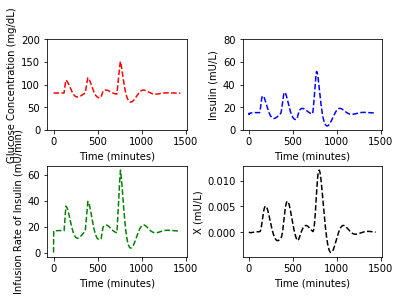

Max Value of Glucose:  150.91665992576264  mg/dL
Max Value of Insulin:  51.519533930259136  mU/L
Min Value of Glucose:  61.19598639288707  mg/dL
Min Value of Insulin:  3.422627079738339  mU/L


In [78]:
print('Table 2: Glucose Concentrations throughout the day where Gmeal = 1.32 from minutes 540 to 560')
print('-------------------------------------------------------------------------------------------------')
print('{:<10s}{:>25s}{:>15s}{:>15s}{:>12s}{:>12s}'.format('Time', 'Glucose Concentration','Insulin', '< 70 mg/dL', '< 65 mg/dL', '< 60 mg/dL'))
print('{:<10s}{:>25s}{:>15s}{:>15s}{:>12s}{:>12s}'.format('(minutes)', '(mg/dL)', '(mU/L)', '( - )', '( - )', '( - )'))
print('-------------------------------------------------------------------------------------------------')
print('{:<10.2f}{:>25.2f}{:>15.2f}{:>15.2f}{:>12.2f}{:>12.2f}'.format(t[0], Gb*18, Ib, less70[0], less65[0], less60[0]))

for i in range(1,itt):
    if i<140 and i>=120:
        Gmeal = 0.96
    elif i < 390 and i>=360:
        Gmeal = 0.72
    elif i < 560 and i >= 540:
        Gmeal = 0.36
    elif i < 760 and i >= 720:
        Gmeal = 1.32
    else:
        Gmeal = 0
    U[i] = Ub + Kc*G[i-1] + Kc/tau*(errsum[i-1])
    I[i] = deltat*(-n*(I[i-1]+Ib) + U[i-1]/V1) + I[i-1]
    X[i] = deltat*(-p2*X[i-1] + p3*I[i-1]) + X[i-1]
    G[i] = deltat*(-p1*G[i-1]-X[i-1]*(Gb+G[i-1]) + Gmeal/V1) + G[i-1]
    errsum[i] = G[i-1]*deltat + G[i-1]
    ### Summarizing interval in which glucose concentration is less than 70 mg/dL, 65 mg/dL, and 60 mg/dL
    if 18*(G[i]+Gb) < 70:
        less70[i] = 1
    if 18*(G[i]+Gb) < 65:
        less65[i] = 1
    if 18*(G[i]+Gb) < 60:
        less60[i] = 1
    if i/60 == math.ceil(i/60):
        print('{:<10.2f}{:>25.2f}{:>15.2f}{:>15.2f}{:>12.2f}{:>12.2f}'
          .format(t[i], 18*(G[i]+Gb), I[i]+Ib, less70[i], less65[i], less60[i]))

#for j in range(itt):
#    print(t[j], G[j])
print('-----------------------------------------------------------------------------------------------------')
plt.subplot(2,2,1)
plt.plot(t,18*(Gb+G),'--r') #Multiply by 18 to convert from mmol/L to mg/dL
plt.ylim(0, 200)
plt.ylabel('Glucose Concentration (mg/dL)')
plt.xlabel('Time (minutes)')

plt.subplot(2,2,2)
plt.plot(t,(Ib+I),'--b')
plt.ylim(0, 80)
plt.ylabel('Insulin (mU/L)')
plt.xlabel('Time (minutes)')

plt.subplot(2,2,3)
plt.plot(t,(U),'--g')
#plt.ylim(0, 80)
plt.ylabel('Infusion Rate of Insulin (mU/min)')
plt.xlabel('Time (minutes)')

plt.subplot(2,2,4)
plt.plot(t,(X),'--k')
#plt.ylim(0, 80)
plt.ylabel('X (mU/L)')
plt.xlabel('Time (minutes)')

plt.subplots_adjust(wspace=.4,hspace=.4)
plt.show()

print('Max Value of Glucose: ', (max(G)+Gb)*18, ' mg/dL')
print('Max Value of Insulin: ', (max(I)+Ib), ' mU/L')
print('Min Value of Glucose: ', (min(G)+Gb)*18, ' mg/dL')
print('Min Value of Insulin: ', (min(I)+Ib), ' mU/L')

## Above Repeated but 20% increase in dinner meal, Gi = 1.44, 540 < t < 560

Table 3: Glucose Concentrations throughout the day where Gi = 1.44 from minutes 540 to 560
-------------------------------------------------------------------------------------------------
Time          Glucose Concentration        Insulin     < 70 mg/dL  < 65 mg/dL  < 60 mg/dL
(minutes)                   (mg/dL)         (mU/L)          ( - )       ( - )       ( - )
-------------------------------------------------------------------------------------------------
0.00                          81.00          15.00           0.00        0.00        0.00
60.00                         81.38          15.20           0.00        0.00        0.00
120.00                        82.60          15.14           0.00        0.00        0.00
180.00                        96.87          27.25           0.00        0.00        0.00
240.00                        75.16          13.24           0.00        0.00        0.00
300.00                        73.96          10.32           0.00        0.00      

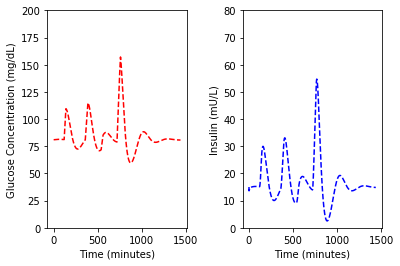

Max Value of Glucose:  157.11832369963525  mg/dL
Max Value of Insulin:  54.70466679991625  mU/L
Min Value of Glucose:  59.679483625630034  mg/dL
Min Value of Insulin:  2.529667252674649  mU/L


In [74]:
print('Table 3: Glucose Concentrations throughout the day where Gi = 1.44 from minutes 540 to 560')
print('-------------------------------------------------------------------------------------------------')
print('{:<10s}{:>25s}{:>15s}{:>15s}{:>12s}{:>12s}'.format('Time', 'Glucose Concentration','Insulin', '< 70 mg/dL', '< 65 mg/dL', '< 60 mg/dL'))
print('{:<10s}{:>25s}{:>15s}{:>15s}{:>12s}{:>12s}'.format('(minutes)', '(mg/dL)', '(mU/L)', '( - )', '( - )', '( - )'))
print('-------------------------------------------------------------------------------------------------')
print('{:<10.2f}{:>25.2f}{:>15.2f}{:>15.2f}{:>12.2f}{:>12.2f}'.format(t[0], Gb*18, Ib, less70[0], less65[0], less60[0]))

for i in range(1,itt):
    if i<140 and i>=120:
        Gmeal = 0.96
    elif i < 390 and i>=360:
        Gmeal = 0.72
    elif i < 560 and i >= 540:
        Gmeal = 0.36
    elif i < 760 and i >= 720:
        Gmeal = 1.44
    else:
        Gmeal = 0
    U[i] = Ub + Kc*G[i-1] + Kc/tau*(errsum[i-1])
    I[i] = deltat*(-n*(I[i-1]+Ib) + U[i-1]/V1) + I[i-1]
    X[i] = deltat*(-p2*X[i-1] + p3*I[i-1]) + X[i-1]
    G[i] = deltat*(-p1*G[i-1]-X[i-1]*(Gb+G[i-1]) + Gmeal/V1) + G[i-1]
    errsum[i] = G[i-1]*deltat + G[i-1]
    ### Summarizing interval in which glucose concentration is less than 70 mg/dL, 65 mg/dL, and 60 mg/dL
    if 18*(G[i]+Gb) < 70:
        less70[i] = 1
    if 18*(G[i]+Gb) < 65:
        less65[i] = 1
    if 18*(G[i]+Gb) < 60:
        less60[i] = 1
    if i/60 == math.ceil(i/60):
        print('{:<10.2f}{:>25.2f}{:>15.2f}{:>15.2f}{:>12.2f}{:>12.2f}'
          .format(t[i], 18*(G[i]+Gb), I[i]+Ib, less70[i], less65[i], less60[i]))

#for j in range(itt):
#    print(t[j], G[j])
print('-----------------------------------------------------------------------------------------------------')
plt.subplot(1,2,1)
plt.plot(t,(Gb+G)*18,'--r') #Multiply by 18 to convert from mmol/L to mg/dL
plt.ylim(0, 200)
plt.ylabel('Glucose Concentration (mg/dL)')
plt.xlabel('Time (minutes)')

plt.subplot(1,2,2)
plt.plot(t,(Ib+I),'--b')
plt.ylim(0, 80)
plt.ylabel('Insulin (mU/L)')
plt.xlabel('Time (minutes)')

plt.subplots_adjust(wspace=.4)
plt.show()

print('Max Value of Glucose: ', (max(G)+Gb)*18, ' mg/dL')
print('Max Value of Insulin: ', (max(I)+Ib), ' mU/L')
print('Min Value of Glucose: ', (min(G)+Gb)*18, ' mg/dL')
print('Min Value of Insulin: ', (min(I)+Ib), ' mU/L')